<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/AGC27_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [458]:
#License: GPL 
#Creator: Mike Smith https://github.com/gomlfx 
#designed for colab/kaggle/Jupyter

In [459]:
#!pip install autogluon
#!pip install --upgrade mxnet

In [460]:
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [461]:
#metatrader5 file format
df=pd.read_csv('/content/GBPAUD_Daily_200708210000_202205060000.csv')

In [462]:
print(df.head())
print(df.tail())
df.info()

  <DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0  2007.08.21\t2.47510\t2.48010\t2.47100\t2.47810...                
1  2007.08.22\t2.47820\t2.48490\t2.46210\t2.46610...                
2  2007.08.23\t2.46600\t2.46910\t2.44050\t2.44660...                
3  2007.08.24\t2.44610\t2.45680\t2.43270\t2.43500...                
4  2007.08.27\t2.43210\t2.43730\t2.42060\t2.43360...                
     <DATE>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
3795  2022.05.02\t1.77694\t1.78577\t1.77031\t1.77198...                
3796  2022.05.03\t1.77119\t1.77330\t1.75453\t1.76114...                
3797  2022.05.04\t1.76031\t1.76202\t1.73553\t1.73974...                
3798  2022.05.05\t1.73837\t1.74321\t1.71787\t1.73793...                
3799  2022.05.06\t1.73810\t1.74504\t1.73218\t1.74463...                
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 1 columns):
 #   Column                                     

In [463]:
df.columns=['header']

In [464]:
df = df.header.str.split('\t', expand=True)

In [465]:
df

,0,1,2,3,4,5,6,7
0,2007.08.21,2.47510,2.48010,2.47100,2.47810,1520,0,100
1,2007.08.22,2.47820,2.48490,2.46210,2.46610,7851,0,100
2,2007.08.23,2.46600,2.46910,2.44050,2.44660,8620,0,100
3,2007.08.24,2.44610,2.45680,2.43270,2.43500,7886,0,100
4,2007.08.27,2.43210,2.43730,2.42060,2.43360,6430,0,100
...,...,...,...,...,...,...,...,...
3795,2022.05.02,1.77694,1.78577,1.77031,1.77198,114909,0,1
3796,2022.05.03,1.77119,1.77330,1.75453,1.76114,127318,0,1
3797,2022.05.04,1.76031,1.76202,1.73553,1.73974,134831,0,1
3798,2022.05.05,1.73837,1.74321,1.71787,1.73793,167536,0,1


In [466]:
df_raw1 = pd.DataFrame(data=df)
df_raw1

,0,1,2,3,4,5,6,7
0,2007.08.21,2.47510,2.48010,2.47100,2.47810,1520,0,100
1,2007.08.22,2.47820,2.48490,2.46210,2.46610,7851,0,100
2,2007.08.23,2.46600,2.46910,2.44050,2.44660,8620,0,100
3,2007.08.24,2.44610,2.45680,2.43270,2.43500,7886,0,100
4,2007.08.27,2.43210,2.43730,2.42060,2.43360,6430,0,100
...,...,...,...,...,...,...,...,...
3795,2022.05.02,1.77694,1.78577,1.77031,1.77198,114909,0,1
3796,2022.05.03,1.77119,1.77330,1.75453,1.76114,127318,0,1
3797,2022.05.04,1.76031,1.76202,1.73553,1.73974,134831,0,1
3798,2022.05.05,1.73837,1.74321,1.71787,1.73793,167536,0,1


In [467]:
df.drop([0,5,6,7], axis=1,inplace=True)
df = df.astype(float, errors = 'raise')

In [468]:
df.rename(columns={1:'p_o',2:'p_h',3:'p_l',4:'p_c'}, inplace=True)

In [469]:
print(df.columns)

Index(['p_o', 'p_h', 'p_l', 'p_c'], dtype='object')


In [470]:
#Features

#195 periods ago
df['p_Open_last_period195'] = df['p_o'].shift(195) 
df['p_High_last_period195'] = df['p_h'].shift(195)
df['p_Low_last_period195'] = df['p_l'].shift(195)
df['p_Close_last_period195'] = df['p_c'].shift(195)
#194 periods ago
df['p_Open_last_period194'] = df['p_o'].shift(194) 
df['p_High_last_period194'] = df['p_h'].shift(194)
df['p_Low_last_period194'] = df['p_l'].shift(194)
df['p_Close_last_period194'] = df['p_c'].shift(194)
#193 periods ago
df['p_Open_last_period193'] = df['p_o'].shift(193) 
df['p_High_last_period193'] = df['p_h'].shift(193)
df['p_Low_last_period193'] = df['p_l'].shift(193)
df['p_Close_last_period193'] = df['p_c'].shift(193)
#192 periods ago
df['p_Open_last_period192'] = df['p_o'].shift(192) 
df['p_High_last_period192'] = df['p_h'].shift(192)
df['p_Low_last_period192'] = df['p_l'].shift(192)
df['p_Close_last_period192'] = df['p_c'].shift(192)
#191 periods ago
df['p_Open_last_period191'] = df['p_o'].shift(191) 
df['p_High_last_period191'] = df['p_h'].shift(191)
df['p_Low_last_period191'] = df['p_l'].shift(191)
df['p_Close_last_period191'] = df['p_c'].shift(191)
#190 periods ago
df['p_Open_last_period190'] = df['p_o'].shift(190) 
df['p_High_last_period190'] = df['p_h'].shift(190)
df['p_Low_last_period190'] = df['p_l'].shift(190)
df['p_Close_last_period190'] = df['p_c'].shift(190)
#189 periods ago
df['p_Open_last_period189'] = df['p_o'].shift(189) 
df['p_High_last_period189'] = df['p_h'].shift(189)
df['p_Low_last_period189'] = df['p_l'].shift(189)
df['p_Close_last_period189'] = df['p_c'].shift(189)
#188 periods ago
df['p_Open_last_period188'] = df['p_o'].shift(188) 
df['p_High_last_period188'] = df['p_h'].shift(188)
df['p_Low_last_period188'] = df['p_l'].shift(188)
df['p_Close_last_period188'] = df['p_c'].shift(188)
#187 periods ago
df['p_Open_last_period187'] = df['p_o'].shift(187) 
df['p_High_last_period187'] = df['p_h'].shift(187)
df['p_Low_last_period187'] = df['p_l'].shift(187)
df['p_Close_last_period187'] = df['p_c'].shift(187)
#186 periods ago
df['p_Open_last_period186'] = df['p_o'].shift(186) 
df['p_High_last_period186'] = df['p_h'].shift(186)
df['p_Low_last_period186'] = df['p_l'].shift(186)
df['p_Close_last_period186'] = df['p_c'].shift(186)
#185 periods ago
df['p_Open_last_period185'] = df['p_o'].shift(185) 
df['p_High_last_period185'] = df['p_h'].shift(185)
df['p_Low_last_period185'] = df['p_l'].shift(185)
df['p_Close_last_period185'] = df['p_c'].shift(185)
#184 periods ago
df['p_Open_last_period184'] = df['p_o'].shift(184) 
df['p_High_last_period184'] = df['p_h'].shift(184)
df['p_Low_last_period184'] = df['p_l'].shift(184)
df['p_Close_last_period184'] = df['p_c'].shift(184)
#183 periods ago
df['p_Open_last_period183'] = df['p_o'].shift(183) 
df['p_High_last_period183'] = df['p_h'].shift(183)
df['p_Low_last_period183'] = df['p_l'].shift(183)
df['p_Close_last_period183'] = df['p_c'].shift(183)
#182 periods ago
df['p_Open_last_period182'] = df['p_o'].shift(182) 
df['p_High_last_period182'] = df['p_h'].shift(182)
df['p_Low_last_period182'] = df['p_l'].shift(182)
df['p_Close_last_period182'] = df['p_c'].shift(182)
#181 periods ago
df['p_Open_last_period181'] = df['p_o'].shift(181) 
df['p_High_last_period181'] = df['p_h'].shift(181)
df['p_Low_last_period181'] = df['p_l'].shift(181)
df['p_Close_last_period181'] = df['p_c'].shift(181)
#180 periods ago
df['p_Open_last_period180'] = df['p_o'].shift(180) 
df['p_High_last_period180'] = df['p_h'].shift(180)
df['p_Low_last_period180'] = df['p_l'].shift(180)
df['p_Close_last_period180'] = df['p_c'].shift(180)
#179 periods ago
df['p_Open_last_period179'] = df['p_o'].shift(179) 
df['p_High_last_period179'] = df['p_h'].shift(179)
df['p_Low_last_period179'] = df['p_l'].shift(179)
df['p_Close_last_period179'] = df['p_c'].shift(179)
#178 periods ago
df['p_Open_last_period178'] = df['p_o'].shift(178) 
df['p_High_last_period178'] = df['p_h'].shift(178)
df['p_Low_last_period178'] = df['p_l'].shift(178)
df['p_Close_last_period178'] = df['p_c'].shift(178)
#177 periods ago
df['p_Open_last_period177'] = df['p_o'].shift(177) 
df['p_High_last_period177'] = df['p_h'].shift(177)
df['p_Low_last_period177'] = df['p_l'].shift(177)
df['p_Close_last_period177'] = df['p_c'].shift(177)
#176 periods ago
df['p_Open_last_period176'] = df['p_o'].shift(176) 
df['p_High_last_period176'] = df['p_h'].shift(176)
df['p_Low_last_period176'] = df['p_l'].shift(176)
df['p_Close_last_period176'] = df['p_c'].shift(176)
#194 periods ago
df['p_Open_last_period175'] = df['p_o'].shift(175) 
df['p_High_last_period175'] = df['p_h'].shift(175)
df['p_Low_last_period175'] = df['p_l'].shift(175)
df['p_Close_last_period175'] = df['p_c'].shift(175)
#174 periods ago
df['p_Open_last_period174'] = df['p_o'].shift(174) 
df['p_High_last_period174'] = df['p_h'].shift(174)
df['p_Low_last_period174'] = df['p_l'].shift(174)
df['p_Close_last_period174'] = df['p_c'].shift(174)
#173 periods ago
df['p_Open_last_period173'] = df['p_o'].shift(173) 
df['p_High_last_period173'] = df['p_h'].shift(173)
df['p_Low_last_period173'] = df['p_l'].shift(173)
df['p_Close_last_period173'] = df['p_c'].shift(173)
#172 periods ago
df['p_Open_last_period172'] = df['p_o'].shift(172) 
df['p_High_last_period172'] = df['p_h'].shift(172)
df['p_Low_last_period172'] = df['p_l'].shift(172)
df['p_Close_last_period172'] = df['p_c'].shift(172)
#171 periods ago
df['p_Open_last_period171'] = df['p_o'].shift(171) 
df['p_High_last_period171'] = df['p_h'].shift(171)
df['p_Low_last_period171'] = df['p_l'].shift(171)
df['p_Close_last_period171'] = df['p_c'].shift(171)
#170 periods ago
df['p_Open_last_period170'] = df['p_o'].shift(170) 
df['p_High_last_period170'] = df['p_h'].shift(170)
df['p_Low_last_period170'] = df['p_l'].shift(170)
df['p_Close_last_period170'] = df['p_c'].shift(170)
#169 periods ago
df['p_Open_last_period169'] = df['p_o'].shift(169) 
df['p_High_last_period169'] = df['p_h'].shift(169)
df['p_Low_last_period169'] = df['p_l'].shift(169)
df['p_Close_last_period169'] = df['p_c'].shift(169)
#168 periods ago
df['p_Open_last_period168'] = df['p_o'].shift(168) 
df['p_High_last_period168'] = df['p_h'].shift(168)
df['p_Low_last_period168'] = df['p_l'].shift(168)
df['p_Close_last_period168'] = df['p_c'].shift(168)
#167 periods ago
df['p_Open_last_period167'] = df['p_o'].shift(167) 
df['p_High_last_period167'] = df['p_h'].shift(167)
df['p_Low_last_period167'] = df['p_l'].shift(167)
df['p_Close_last_period167'] = df['p_c'].shift(167)
#166 periods ago
df['p_Open_last_period166'] = df['p_o'].shift(166) 
df['p_High_last_period166'] = df['p_h'].shift(166)
df['p_Low_last_period166'] = df['p_l'].shift(166)
df['p_Close_last_period166'] = df['p_c'].shift(166)
#165 periods ago
df['p_Open_last_period165'] = df['p_o'].shift(165) 
df['p_High_last_period165'] = df['p_h'].shift(165)
df['p_Low_last_period165'] = df['p_l'].shift(165)
df['p_Close_last_period165'] = df['p_c'].shift(165)
#164 periods ago
df['p_Open_last_period164'] = df['p_o'].shift(164) 
df['p_High_last_period164'] = df['p_h'].shift(164)
df['p_Low_last_period164'] = df['p_l'].shift(164)
df['p_Close_last_period164'] = df['p_c'].shift(164)
#163 periods ago
df['p_Open_last_period163'] = df['p_o'].shift(163) 
df['p_High_last_period163'] = df['p_h'].shift(163)
df['p_Low_last_period163'] = df['p_l'].shift(163)
df['p_Close_last_period163'] = df['p_c'].shift(163)
#162 periods ago
df['p_Open_last_period162'] = df['p_o'].shift(162) 
df['p_High_last_period162'] = df['p_h'].shift(162)
df['p_Low_last_period162'] = df['p_l'].shift(162)
df['p_Close_last_period162'] = df['p_c'].shift(162)
#161 periods ago
df['p_Open_last_period161'] = df['p_o'].shift(161) 
df['p_High_last_period161'] = df['p_h'].shift(161)
df['p_Low_last_period161'] = df['p_l'].shift(161)
df['p_Close_last_period161'] = df['p_c'].shift(161)
#160 periods ago
df['p_Open_last_period160'] = df['p_o'].shift(160) 
df['p_High_last_period160'] = df['p_h'].shift(160)
df['p_Low_last_period160'] = df['p_l'].shift(160)
df['p_Close_last_period160'] = df['p_c'].shift(160)
#59 periods ago
df['p_Open_last_period159'] = df['p_o'].shift(159) 
df['p_High_last_period159'] = df['p_h'].shift(159)
df['p_Low_last_period159'] = df['p_l'].shift(159)
df['p_Close_last_period159'] = df['p_c'].shift(159)
#158 periods ago
df['p_Open_last_period158'] = df['p_o'].shift(158) 
df['p_High_last_period158'] = df['p_h'].shift(158)
df['p_Low_last_period158'] = df['p_l'].shift(158)
df['p_Close_last_period158'] = df['p_c'].shift(158)
#157 periods ago
df['p_Open_last_period157'] = df['p_o'].shift(157) 
df['p_High_last_period157'] = df['p_h'].shift(157)
df['p_Low_last_period157'] = df['p_l'].shift(157)
df['p_Close_last_period157'] = df['p_c'].shift(157)
#156 periods ago
df['p_Open_last_period156'] = df['p_o'].shift(156) 
df['p_High_last_period156'] = df['p_h'].shift(156)
df['p_Low_last_period156'] = df['p_l'].shift(156)
df['p_Close_last_period156'] = df['p_c'].shift(156)
#155 periods ago
df['p_Open_last_period155'] = df['p_o'].shift(155) 
df['p_High_last_period155'] = df['p_h'].shift(155)
df['p_Low_last_period155'] = df['p_l'].shift(155)
df['p_Close_last_period155'] = df['p_c'].shift(155)
#154 periods ago
df['p_Open_last_period154'] = df['p_o'].shift(154) 
df['p_High_last_period154'] = df['p_h'].shift(154)
df['p_Low_last_period154'] = df['p_l'].shift(154)
df['p_Close_last_period154'] = df['p_c'].shift(154)
#153 periods ago
df['p_Open_last_period153'] = df['p_o'].shift(153) 
df['p_High_last_period153'] = df['p_h'].shift(153)
df['p_Low_last_period153'] = df['p_l'].shift(153)
df['p_Close_last_period153'] = df['p_c'].shift(153)
#152 periods ago
df['p_Open_last_period152'] = df['p_o'].shift(152) 
df['p_High_last_period152'] = df['p_h'].shift(152)
df['p_Low_last_period152'] = df['p_l'].shift(152)
df['p_Close_last_period152'] = df['p_c'].shift(152)
#151 periods ago
df['p_Open_last_period151'] = df['p_o'].shift(151) 
df['p_High_last_period151'] = df['p_h'].shift(151)
df['p_Low_last_period151'] = df['p_l'].shift(151)
df['p_Close_last_period151'] = df['p_c'].shift(151)
#150 periods ago
df['p_Open_last_period150'] = df['p_o'].shift(150) 
df['p_High_last_period150'] = df['p_h'].shift(150)
df['p_Low_last_period150'] = df['p_l'].shift(150)
df['p_Close_last_period150'] = df['p_c'].shift(150)
#149 periods ago
df['p_Open_last_period149'] = df['p_o'].shift(149) 
df['p_High_last_period149'] = df['p_h'].shift(149)
df['p_Low_last_period149'] = df['p_l'].shift(149)
df['p_Close_last_period149'] = df['p_c'].shift(149)
#148 periods ago
df['p_Open_last_period148'] = df['p_o'].shift(148) 
df['p_High_last_period148'] = df['p_h'].shift(148)
df['p_Low_last_period148'] = df['p_l'].shift(148)
df['p_Close_last_period148'] = df['p_c'].shift(148)
#147 periods ago
df['p_Open_last_period147'] = df['p_o'].shift(147) 
df['p_High_last_period147'] = df['p_h'].shift(147)
df['p_Low_last_period147'] = df['p_l'].shift(147)
df['p_Close_last_period147'] = df['p_c'].shift(147)
#146 periods ago
df['p_Open_last_period146'] = df['p_o'].shift(146) 
df['p_High_last_period146'] = df['p_h'].shift(146)
df['p_Low_last_period146'] = df['p_l'].shift(146)
df['p_Close_last_period146'] = df['p_c'].shift(146)
#145 periods ago
df['p_Open_last_period145'] = df['p_o'].shift(145) 
df['p_High_last_period145'] = df['p_h'].shift(145)
df['p_Low_last_period145'] = df['p_l'].shift(145)
df['p_Close_last_period145'] = df['p_c'].shift(145)
#144 periods ago
df['p_Open_last_period144'] = df['p_o'].shift(144) 
df['p_High_last_period144'] = df['p_h'].shift(144)
df['p_Low_last_period144'] = df['p_l'].shift(144)
df['p_Close_last_period144'] = df['p_c'].shift(144)
#143 periods ago
df['p_Open_last_period143'] = df['p_o'].shift(143) 
df['p_High_last_period143'] = df['p_h'].shift(143)
df['p_Low_last_period143'] = df['p_l'].shift(143)
df['p_Close_last_period143'] = df['p_c'].shift(143)
#142 periods ago
df['p_Open_last_period142'] = df['p_o'].shift(142) 
df['p_High_last_period142'] = df['p_h'].shift(142)
df['p_Low_last_period142'] = df['p_l'].shift(142)
df['p_Close_last_period142'] = df['p_c'].shift(142)
#141 periods ago
df['p_Open_last_period141'] = df['p_o'].shift(141) 
df['p_High_last_period141'] = df['p_h'].shift(141)
df['p_Low_last_period141'] = df['p_l'].shift(141)
df['p_Close_last_period141'] = df['p_c'].shift(141)
#140 periods ago
df['p_Open_last_period140'] = df['p_o'].shift(140) 
df['p_High_last_period140'] = df['p_h'].shift(140)
df['p_Low_last_period140'] = df['p_l'].shift(140)
df['p_Close_last_period140'] = df['p_c'].shift(140)
#139 periods ago
df['p_Open_last_period139'] = df['p_o'].shift(139) 
df['p_High_last_period139'] = df['p_h'].shift(139)
df['p_Low_last_period139'] = df['p_l'].shift(139)
df['p_Close_last_period139'] = df['p_c'].shift(139)
#138 periods ago
df['p_Open_last_period138'] = df['p_o'].shift(138) 
df['p_High_last_period138'] = df['p_h'].shift(138)
df['p_Low_last_period138'] = df['p_l'].shift(138)
df['p_Close_last_period138'] = df['p_c'].shift(138)
#137 periods ago
df['p_Open_last_period137'] = df['p_o'].shift(137) 
df['p_High_last_period137'] = df['p_h'].shift(137)
df['p_Low_last_period137'] = df['p_l'].shift(137)
df['p_Close_last_period137'] = df['p_c'].shift(137)
#136 periods ago
df['p_Open_last_period136'] = df['p_o'].shift(136) 
df['p_High_last_period136'] = df['p_h'].shift(136)
df['p_Low_last_period136'] = df['p_l'].shift(136)
df['p_Close_last_period136'] = df['p_c'].shift(136)
#135 periods ago
df['p_Open_last_period135'] = df['p_o'].shift(135) 
df['p_High_last_period135'] = df['p_h'].shift(135)
df['p_Low_last_period135'] = df['p_l'].shift(135)
df['p_Close_last_period135'] = df['p_c'].shift(135)
#134 periods ago
df['p_Open_last_period134'] = df['p_o'].shift(134) 
df['p_High_last_period134'] = df['p_h'].shift(134)
df['p_Low_last_period134'] = df['p_l'].shift(134)
df['p_Close_last_period134'] = df['p_c'].shift(134)
#133 periods ago
df['p_Open_last_period133'] = df['p_o'].shift(133) 
df['p_High_last_period133'] = df['p_h'].shift(133)
df['p_Low_last_period133'] = df['p_l'].shift(133)
df['p_Close_last_period133'] = df['p_c'].shift(133)
#132 periods ago
df['p_Open_last_period132'] = df['p_o'].shift(132) 
df['p_High_last_period132'] = df['p_h'].shift(132)
df['p_Low_last_period132'] = df['p_l'].shift(132)
df['p_Close_last_period132'] = df['p_c'].shift(132)
#131 periods ago
df['p_Open_last_period131'] = df['p_o'].shift(131) 
df['p_High_last_period131'] = df['p_h'].shift(131)
df['p_Low_last_period131'] = df['p_l'].shift(131)
df['p_Close_last_period131'] = df['p_c'].shift(131)
#30 periods ago
df['p_Open_last_period130'] = df['p_o'].shift(130) 
df['p_High_last_period130'] = df['p_h'].shift(130)
df['p_Low_last_period130'] = df['p_l'].shift(130)
df['p_Close_last_period130'] = df['p_c'].shift(130)
#129 periods ago
df['p_Open_last_period129'] = df['p_o'].shift(129) 
df['p_High_last_period129'] = df['p_h'].shift(129)
df['p_Low_last_period129'] = df['p_l'].shift(129)
df['p_Close_last_period129'] = df['p_c'].shift(129)
#128 periods ago
df['p_Open_last_period128'] = df['p_o'].shift(128) 
df['p_High_last_period128'] = df['p_h'].shift(128)
df['p_Low_last_period128'] = df['p_l'].shift(128)
df['p_Close_last_period128'] = df['p_c'].shift(128)
#127 periods ago
df['p_Open_last_period127'] = df['p_o'].shift(127) 
df['p_High_last_period127'] = df['p_h'].shift(127)
df['p_Low_last_period127'] = df['p_l'].shift(127)
df['p_Close_last_period127'] = df['p_c'].shift(127)
#126 periods ago
df['p_Open_last_period126'] = df['p_o'].shift(126) 
df['p_High_last_period126'] = df['p_h'].shift(126)
df['p_Low_last_period126'] = df['p_l'].shift(126)
df['p_Close_last_period126'] = df['p_c'].shift(126)
#125 periods ago
df['p_Open_last_period125'] = df['p_o'].shift(125) 
df['p_High_last_period125'] = df['p_h'].shift(125)
df['p_Low_last_period125'] = df['p_l'].shift(125)
df['p_Close_last_period125'] = df['p_c'].shift(125)
#124 periods ago
df['p_Open_last_period124'] = df['p_o'].shift(124) 
df['p_High_last_period124'] = df['p_h'].shift(124)
df['p_Low_last_period124'] = df['p_l'].shift(124)
df['p_Close_last_period124'] = df['p_c'].shift(124)
#123 periods ago
df['p_Open_last_period123'] = df['p_o'].shift(123) 
df['p_High_last_period123'] = df['p_h'].shift(123)
df['p_Low_last_period123'] = df['p_l'].shift(123)
df['p_Close_last_period123'] = df['p_c'].shift(123)
#122 periods ago
df['p_Open_last_period122'] = df['p_o'].shift(122) 
df['p_High_last_period122'] = df['p_h'].shift(122)
df['p_Low_last_period122'] = df['p_l'].shift(122)
df['p_Close_last_period122'] = df['p_c'].shift(122)
#121 periods ago
df['p_Open_last_period121'] = df['p_o'].shift(121) 
df['p_High_last_period121'] = df['p_h'].shift(21)
df['p_Low_last_period121'] = df['p_l'].shift(121)
df['p_Close_last_period121'] = df['p_c'].shift(121)
#120 periods ago
df['p_Open_last_period120'] = df['p_o'].shift(120) 
df['p_High_last_period120'] = df['p_h'].shift(120)
df['p_Low_last_period120'] = df['p_l'].shift(120)
df['p_Close_last_period120'] = df['p_c'].shift(120)
#119 periods ago
df['p_Open_last_period119'] = df['p_o'].shift(119) 
df['p_High_last_period119'] = df['p_h'].shift(119)
df['p_Low_last_period119'] = df['p_l'].shift(119)
df['p_Close_last_period119'] = df['p_c'].shift(119)
#118 periods ago
df['p_Open_last_period118'] = df['p_o'].shift(118) 
df['p_High_last_period118'] = df['p_h'].shift(118)
df['p_Low_last_period118'] = df['p_l'].shift(118)
df['p_Close_last_period118'] = df['p_c'].shift(118)
#117 periods ago
df['p_Open_last_period117'] = df['p_o'].shift(117) 
df['p_High_last_period117'] = df['p_h'].shift(117)
df['p_Low_last_period117'] = df['p_l'].shift(117)
df['p_Close_last_period117'] = df['p_c'].shift(117)
#116 periods ago
df['p_Open_last_period116'] = df['p_o'].shift(116) 
df['p_High_last_period116'] = df['p_h'].shift(116)
df['p_Low_last_period116'] = df['p_l'].shift(116)
df['p_Close_last_period116'] = df['p_c'].shift(116)
#115 periods ago
df['p_Open_last_period115'] = df['p_o'].shift(115) 
df['p_High_last_period115'] = df['p_h'].shift(115)
df['p_Low_last_period115'] = df['p_l'].shift(115)
df['p_Close_last_period115'] = df['p_c'].shift(115)
#114 periods ago
df['p_Open_last_period114'] = df['p_o'].shift(114) 
df['p_High_last_period114'] = df['p_h'].shift(114)
df['p_Low_last_period1014'] = df['p_l'].shift(114)
df['p_Close_last_period114'] = df['p_c'].shift(114)
#113 periods ago
df['p_Open_last_period113'] = df['p_o'].shift(113) 
df['p_High_last_period113'] = df['p_h'].shift(113)
df['p_Low_last_period113'] = df['p_l'].shift(113)
df['p_Close_last_period113'] = df['p_c'].shift(113)
#112 periods ago
df['p_Open_last_period112'] = df['p_o'].shift(112) 
df['p_High_last_period112'] = df['p_h'].shift(112)
df['p_Low_last_period112'] = df['p_l'].shift(112)
df['p_Close_last_period112'] = df['p_c'].shift(112)
#111 periods ago
df['p_Open_last_period111'] = df['p_o'].shift(111) 
df['p_High_last_period111'] = df['p_h'].shift(111)
df['p_Low_last_period111'] = df['p_l'].shift(111)
df['p_Close_last_period111'] = df['p_c'].shift(111)
#110 periods ago
df['p_Open_last_period110'] = df['p_o'].shift(110) 
df['p_High_last_period110'] = df['p_h'].shift(110)
df['p_Low_last_period110'] = df['p_l'].shift(110)
df['p_Close_last_period110'] = df['p_c'].shift(110)
#109 periods ago
df['p_Open_last_period109'] = df['p_o'].shift(109) 
df['p_High_last_period109'] = df['p_h'].shift(109)
df['p_Low_last_period109'] = df['p_l'].shift(109)
df['p_Close_last_period109'] = df['p_c'].shift(109)
#108 periods ago
df['p_Open_last_period108'] = df['p_o'].shift(108) 
df['p_High_last_period108'] = df['p_h'].shift(108)
df['p_Low_last_period108'] = df['p_l'].shift(108)
df['p_Close_last_period108'] = df['p_c'].shift(108)
#107 periods ago
df['p_Open_last_period107'] = df['p_o'].shift(107) 
df['p_High_last_period107'] = df['p_h'].shift(107)
df['p_Low_last_period107'] = df['p_l'].shift(107)
df['p_Close_last_period107'] = df['p_c'].shift(107)
#106 periods ago
df['p_Open_last_period106'] = df['p_o'].shift(106) 
df['p_High_last_period106'] = df['p_h'].shift(106)
df['p_Low_last_period106'] = df['p_l'].shift(106)
df['p_Close_last_period106'] = df['p_c'].shift(106)
#105 periods ago
df['p_Open_last_period105'] = df['p_o'].shift(105) 
df['p_High_last_period105'] = df['p_h'].shift(105)
df['p_Low_last_period105'] = df['p_l'].shift(105)
df['p_Close_last_period105'] = df['p_c'].shift(105)
#104 periods ago
df['p_Open_last_period104'] = df['p_o'].shift(104) 
df['p_High_last_period104'] = df['p_h'].shift(104)
df['p_Low_last_period104'] = df['p_l'].shift(104)
df['p_Close_last_period104'] = df['p_c'].shift(104)
#103 periods ago
df['p_Open_last_period103'] = df['p_o'].shift(103) 
df['p_High_last_period103'] = df['p_h'].shift(103)
df['p_Low_last_period103'] = df['p_l'].shift(103)
df['p_Close_last_period103'] = df['p_c'].shift(103)
#102 periods ago
df['p_Open_last_period102'] = df['p_o'].shift(102) 
df['p_High_last_period102'] = df['p_h'].shift(102)
df['p_Low_last_period102'] = df['p_l'].shift(102)
df['p_Close_last_period102'] = df['p_c'].shift(102)
#101 periods ago
df['p_Open_last_period101'] = df['p_o'].shift(101) 
df['p_High_last_period101'] = df['p_h'].shift(101)
df['p_Low_last_period101'] = df['p_l'].shift(101)
df['p_Close_last_period101'] = df['p_c'].shift(101)
#100 periods ago
df['p_Open_last_period100'] = df['p_o'].shift(100) 
df['p_High_last_period100'] = df['p_h'].shift(100)
df['p_Low_last_period100'] = df['p_l'].shift(100)
df['p_Close_last_period100'] = df['p_c'].shift(100)
#99 periods ago
df['p_Open_last_period99'] = df['p_o'].shift(99) 
df['p_High_last_period99'] = df['p_h'].shift(99)
df['p_Low_last_period99'] = df['p_l'].shift(99)
df['p_Close_last_period99'] = df['p_c'].shift(99)
#98 periods ago
df['p_Open_last_period98'] = df['p_o'].shift(98) 
df['p_High_last_period98'] = df['p_h'].shift(98)
df['p_Low_last_period98'] = df['p_l'].shift(98)
df['p_Close_last_period98'] = df['p_c'].shift(98)
#97 periods ago
df['p_Open_last_period97'] = df['p_o'].shift(97) 
df['p_High_last_period97'] = df['p_h'].shift(97)
df['p_Low_last_period97'] = df['p_l'].shift(97)
df['p_Close_last_period97'] = df['p_c'].shift(97)
#96 periods ago
df['p_Open_last_period96'] = df['p_o'].shift(96) 
df['p_High_last_period96'] = df['p_h'].shift(96)
df['p_Low_last_period96'] = df['p_l'].shift(96)
df['p_Close_last_period96'] = df['p_c'].shift(96)
#95 periods ago
df['p_Open_last_period95'] = df['p_o'].shift(95) 
df['p_High_last_period95'] = df['p_h'].shift(95)
df['p_Low_last_period95'] = df['p_l'].shift(95)
df['p_Close_last_period95'] = df['p_c'].shift(95)
#94 periods ago
df['p_Open_last_period94'] = df['p_o'].shift(94) 
df['p_High_last_period94'] = df['p_h'].shift(94)
df['p_Low_last_period94'] = df['p_l'].shift(94)
df['p_Close_last_period94'] = df['p_c'].shift(94)
#93 periods ago
df['p_Open_last_period93'] = df['p_o'].shift(93) 
df['p_High_last_period93'] = df['p_h'].shift(93)
df['p_Low_last_period93'] = df['p_l'].shift(93)
df['p_Close_last_period93'] = df['p_c'].shift(93)
#92 periods ago
df['p_Open_last_period92'] = df['p_o'].shift(92) 
df['p_High_last_period92'] = df['p_h'].shift(92)
df['p_Low_last_period92'] = df['p_l'].shift(92)
df['p_Close_last_period92'] = df['p_c'].shift(92)
#91 periods ago
df['p_Open_last_period91'] = df['p_o'].shift(91) 
df['p_High_last_period91'] = df['p_h'].shift(91)
df['p_Low_last_period91'] = df['p_l'].shift(91)
df['p_Close_last_period91'] = df['p_c'].shift(91)
#90 periods ago
df['p_Open_last_period90'] = df['p_o'].shift(90) 
df['p_High_last_period90'] = df['p_h'].shift(90)
df['p_Low_last_period90'] = df['p_l'].shift(90)
df['p_Close_last_period90'] = df['p_c'].shift(90)
#89 periods ago
df['p_Open_last_period89'] = df['p_o'].shift(89) 
df['p_High_last_period89'] = df['p_h'].shift(89)
df['p_Low_last_period89'] = df['p_l'].shift(89)
df['p_Close_last_period89'] = df['p_c'].shift(89)
#88 periods ago
df['p_Open_last_period88'] = df['p_o'].shift(88) 
df['p_High_last_period88'] = df['p_h'].shift(88)
df['p_Low_last_period88'] = df['p_l'].shift(88)
df['p_Close_last_period88'] = df['p_c'].shift(88)
#87 periods ago
df['p_Open_last_period87'] = df['p_o'].shift(87) 
df['p_High_last_period87'] = df['p_h'].shift(87)
df['p_Low_last_period87'] = df['p_l'].shift(87)
df['p_Close_last_period87'] = df['p_c'].shift(87)
#86 periods ago
df['p_Open_last_period86'] = df['p_o'].shift(86) 
df['p_High_last_period86'] = df['p_h'].shift(86)
df['p_Low_last_period86'] = df['p_l'].shift(86)
df['p_Close_last_period86'] = df['p_c'].shift(86)
#85 periods ago
df['p_Open_last_period85'] = df['p_o'].shift(85) 
df['p_High_last_period85'] = df['p_h'].shift(85)
df['p_Low_last_period85'] = df['p_l'].shift(85)
df['p_Close_last_period85'] = df['p_c'].shift(85)
#84 periods ago
df['p_Open_last_period84'] = df['p_o'].shift(84) 
df['p_High_last_period84'] = df['p_h'].shift(84)
df['p_Low_last_period84'] = df['p_l'].shift(84)
df['p_Close_last_period84'] = df['p_c'].shift(84)
#83 periods ago
df['p_Open_last_period83'] = df['p_o'].shift(83) 
df['p_High_last_period83'] = df['p_h'].shift(83)
df['p_Low_last_period83'] = df['p_l'].shift(83)
df['p_Close_last_period83'] = df['p_c'].shift(83)
#82 periods ago
df['p_Open_last_period82'] = df['p_o'].shift(82) 
df['p_High_last_period82'] = df['p_h'].shift(82)
df['p_Low_last_period82'] = df['p_l'].shift(82)
df['p_Close_last_period82'] = df['p_c'].shift(82)
#81 periods ago
df['p_Open_last_period81'] = df['p_o'].shift(81) 
df['p_High_last_period81'] = df['p_h'].shift(81)
df['p_Low_last_period81'] = df['p_l'].shift(81)
df['p_Close_last_period81'] = df['p_c'].shift(81)
#80 periods ago
df['p_Open_last_period80'] = df['p_o'].shift(80) 
df['p_High_last_period80'] = df['p_h'].shift(80)
df['p_Low_last_period80'] = df['p_l'].shift(80)
df['p_Close_last_period80'] = df['p_c'].shift(80)
#79 periods ago
df['p_Open_last_period79'] = df['p_o'].shift(79) 
df['p_High_last_period79'] = df['p_h'].shift(79)
df['p_Low_last_period79'] = df['p_l'].shift(79)
df['p_Close_last_period79'] = df['p_c'].shift(79)
#78 periods ago
df['p_Open_last_period78'] = df['p_o'].shift(78) 
df['p_High_last_period78'] = df['p_h'].shift(78)
df['p_Low_last_period78'] = df['p_l'].shift(78)
df['p_Close_last_period78'] = df['p_c'].shift(78)
#77 periods ago
df['p_Open_last_period77'] = df['p_o'].shift(77) 
df['p_High_last_period77'] = df['p_h'].shift(77)
df['p_Low_last_period77'] = df['p_l'].shift(77)
df['p_Close_last_period77'] = df['p_c'].shift(77)
#76 periods ago
df['p_Open_last_period76'] = df['p_o'].shift(76) 
df['p_High_last_period76'] = df['p_h'].shift(76)
df['p_Low_last_period76'] = df['p_l'].shift(76)
df['p_Close_last_period76'] = df['p_c'].shift(76)
#75 periods ago
df['p_Open_last_period75'] = df['p_o'].shift(75) 
df['p_High_last_period75'] = df['p_h'].shift(75)
df['p_Low_last_period75'] = df['p_l'].shift(75)
df['p_Close_last_period75'] = df['p_c'].shift(75)
#74 periods ago
df['p_Open_last_period74'] = df['p_o'].shift(74) 
df['p_High_last_period74'] = df['p_h'].shift(74)
df['p_Low_last_period74'] = df['p_l'].shift(74)
df['p_Close_last_period74'] = df['p_c'].shift(74)
#73 periods ago
df['p_Open_last_period73'] = df['p_o'].shift(73) 
df['p_High_last_period73'] = df['p_h'].shift(73)
df['p_Low_last_period73'] = df['p_l'].shift(73)
df['p_Close_last_period73'] = df['p_c'].shift(73)
#72 periods ago
df['p_Open_last_period72'] = df['p_o'].shift(72) 
df['p_High_last_period72'] = df['p_h'].shift(72)
df['p_Low_last_period72'] = df['p_l'].shift(72)
df['p_Close_last_period72'] = df['p_c'].shift(72)
#71 periods ago
df['p_Open_last_period71'] = df['p_o'].shift(71) 
df['p_High_last_period71'] = df['p_h'].shift(71)
df['p_Low_last_period71'] = df['p_l'].shift(71)
df['p_Close_last_period71'] = df['p_c'].shift(71)
#70 periods ago
df['p_Open_last_period70'] = df['p_o'].shift(70) 
df['p_High_last_period70'] = df['p_h'].shift(70)
df['p_Low_last_period70'] = df['p_l'].shift(70)
df['p_Close_last_period70'] = df['p_c'].shift(70)
#69 periods ago
df['p_Open_last_period69'] = df['p_o'].shift(69) 
df['p_High_last_period69'] = df['p_h'].shift(69)
df['p_Low_last_period69'] = df['p_l'].shift(69)
df['p_Close_last_period69'] = df['p_c'].shift(69)
#68 periods ago
df['p_Open_last_period68'] = df['p_o'].shift(68) 
df['p_High_last_period68'] = df['p_h'].shift(68)
df['p_Low_last_period68'] = df['p_l'].shift(68)
df['p_Close_last_period68'] = df['p_c'].shift(68)
#67 periods ago
df['p_Open_last_period67'] = df['p_o'].shift(67) 
df['p_High_last_period67'] = df['p_h'].shift(67)
df['p_Low_last_period67'] = df['p_l'].shift(67)
df['p_Close_last_period67'] = df['p_c'].shift(67)
#66 periods ago
df['p_Open_last_period66'] = df['p_o'].shift(66) 
df['p_High_last_period66'] = df['p_h'].shift(66)
df['p_Low_last_period66'] = df['p_l'].shift(66)
df['p_Close_last_period66'] = df['p_c'].shift(66)
#65 periods ago
df['p_Open_last_period65'] = df['p_o'].shift(65) 
df['p_High_last_period65'] = df['p_h'].shift(65)
df['p_Low_last_period65'] = df['p_l'].shift(65)
df['p_Close_last_period65'] = df['p_c'].shift(65)
#64 periods ago
df['p_Open_last_period64'] = df['p_o'].shift(64) 
df['p_High_last_period64'] = df['p_h'].shift(64)
df['p_Low_last_period64'] = df['p_l'].shift(64)
df['p_Close_last_period64'] = df['p_c'].shift(64)
#63 periods ago
df['p_Open_last_period63'] = df['p_o'].shift(63) 
df['p_High_last_period63'] = df['p_h'].shift(63)
df['p_Low_last_period63'] = df['p_l'].shift(63)
df['p_Close_last_period63'] = df['p_c'].shift(63)
#62 periods ago
df['p_Open_last_period62'] = df['p_o'].shift(62) 
df['p_High_last_period62'] = df['p_h'].shift(62)
df['p_Low_last_period62'] = df['p_l'].shift(62)
df['p_Close_last_period62'] = df['p_c'].shift(62)
#61 periods ago
df['p_Open_last_period61'] = df['p_o'].shift(61) 
df['p_High_last_period61'] = df['p_h'].shift(61)
df['p_Low_last_period61'] = df['p_l'].shift(61)
df['p_Close_last_period61'] = df['p_c'].shift(61)
#60 periods ago
df['p_Open_last_period60'] = df['p_o'].shift(60) 
df['p_High_last_period60'] = df['p_h'].shift(60)
df['p_Low_last_period60'] = df['p_l'].shift(60)
df['p_Close_last_period60'] = df['p_c'].shift(60)
#59 periods ago
df['p_Open_last_period59'] = df['p_o'].shift(59) 
df['p_High_last_period59'] = df['p_h'].shift(59)
df['p_Low_last_period59'] = df['p_l'].shift(59)
df['p_Close_last_period59'] = df['p_c'].shift(59)
#58 periods ago
df['p_Open_last_period58'] = df['p_o'].shift(58) 
df['p_High_last_period58'] = df['p_h'].shift(58)
df['p_Low_last_period58'] = df['p_l'].shift(58)
df['p_Close_last_period58'] = df['p_c'].shift(58)
#57 periods ago
df['p_Open_last_period57'] = df['p_o'].shift(57) 
df['p_High_last_period57'] = df['p_h'].shift(57)
df['p_Low_last_period57'] = df['p_l'].shift(57)
df['p_Close_last_period57'] = df['p_c'].shift(57)
#56 periods ago
df['p_Open_last_period56'] = df['p_o'].shift(56) 
df['p_High_last_period56'] = df['p_h'].shift(56)
df['p_Low_last_period56'] = df['p_l'].shift(56)
df['p_Close_last_period56'] = df['p_c'].shift(56)
#55 periods ago
df['p_Open_last_period55'] = df['p_o'].shift(55) 
df['p_High_last_period55'] = df['p_h'].shift(55)
df['p_Low_last_period55'] = df['p_l'].shift(55)
df['p_Close_last_period55'] = df['p_c'].shift(55)
#54 periods ago
df['p_Open_last_period54'] = df['p_o'].shift(54) 
df['p_High_last_period54'] = df['p_h'].shift(54)
df['p_Low_last_period54'] = df['p_l'].shift(54)
df['p_Close_last_period54'] = df['p_c'].shift(54)
#53 periods ago
df['p_Open_last_period53'] = df['p_o'].shift(53) 
df['p_High_last_period53'] = df['p_h'].shift(53)
df['p_Low_last_period53'] = df['p_l'].shift(53)
df['p_Close_last_period53'] = df['p_c'].shift(53)
#52 periods ago
df['p_Open_last_period52'] = df['p_o'].shift(52) 
df['p_High_last_period52'] = df['p_h'].shift(52)
df['p_Low_last_period52'] = df['p_l'].shift(52)
df['p_Close_last_period52'] = df['p_c'].shift(52)
#51 periods ago
df['p_Open_last_period51'] = df['p_o'].shift(51) 
df['p_High_last_period51'] = df['p_h'].shift(51)
df['p_Low_last_period51'] = df['p_l'].shift(51)
df['p_Close_last_period51'] = df['p_c'].shift(51)
#50 periods ago
df['p_Open_last_period50'] = df['p_o'].shift(50) 
df['p_High_last_period50'] = df['p_h'].shift(50)
df['p_Low_last_period50'] = df['p_l'].shift(50)
df['p_Close_last_period50'] = df['p_c'].shift(50)
#49 periods ago
df['p_Open_last_period49'] = df['p_o'].shift(49) 
df['p_High_last_period49'] = df['p_h'].shift(49)
df['p_Low_last_period49'] = df['p_l'].shift(49)
df['p_Close_last_period49'] = df['p_c'].shift(49)
#48 periods ago
df['p_Open_last_period48'] = df['p_o'].shift(48) 
df['p_High_last_period48'] = df['p_h'].shift(48)
df['p_Low_last_period48'] = df['p_l'].shift(48)
df['p_Close_last_period48'] = df['p_c'].shift(48)
#47 periods ago
df['p_Open_last_period47'] = df['p_o'].shift(47) 
df['p_High_last_period47'] = df['p_h'].shift(47)
df['p_Low_last_period47'] = df['p_l'].shift(47)
df['p_Close_last_period47'] = df['p_c'].shift(47)
#46 periods ago
df['p_Open_last_period46'] = df['p_o'].shift(46) 
df['p_High_last_period46'] = df['p_h'].shift(46)
df['p_Low_last_period46'] = df['p_l'].shift(46)
df['p_Close_last_period46'] = df['p_c'].shift(46)
#45 periods ago
df['p_Open_last_period45'] = df['p_o'].shift(45) 
df['p_High_last_period45'] = df['p_h'].shift(45)
df['p_Low_last_period45'] = df['p_l'].shift(45)
df['p_Close_last_period45'] = df['p_c'].shift(45)
#44 periods ago
df['p_Open_last_period44'] = df['p_o'].shift(44) 
df['p_High_last_period44'] = df['p_h'].shift(44)
df['p_Low_last_period44'] = df['p_l'].shift(44)
df['p_Close_last_period44'] = df['p_c'].shift(44)
#43 periods ago
df['p_Open_last_period43'] = df['p_o'].shift(43) 
df['p_High_last_period43'] = df['p_h'].shift(43)
df['p_Low_last_period43'] = df['p_l'].shift(43)
df['p_Close_last_period43'] = df['p_c'].shift(43)
#42 periods ago
df['p_Open_last_period42'] = df['p_o'].shift(42) 
df['p_High_last_period42'] = df['p_h'].shift(42)
df['p_Low_last_period42'] = df['p_l'].shift(42)
df['p_Close_last_period42'] = df['p_c'].shift(42)
#41 periods ago
df['p_Open_last_period41'] = df['p_o'].shift(41) 
df['p_High_last_period41'] = df['p_h'].shift(41)
df['p_Low_last_period41'] = df['p_l'].shift(41)
df['p_Close_last_period41'] = df['p_c'].shift(41)
#40 periods ago
df['p_Open_last_period40'] = df['p_o'].shift(40) 
df['p_High_last_period40'] = df['p_h'].shift(40)
df['p_Low_last_period40'] = df['p_l'].shift(40)
df['p_Close_last_period40'] = df['p_c'].shift(40)
#39 periods ago
df['p_Open_last_period39'] = df['p_o'].shift(39) 
df['p_High_last_period39'] = df['p_h'].shift(39)
df['p_Low_last_period39'] = df['p_l'].shift(39)
df['p_Close_last_period39'] = df['p_c'].shift(39)
#38 periods ago
df['p_Open_last_period38'] = df['p_o'].shift(38) 
df['p_High_last_period38'] = df['p_h'].shift(38)
df['p_Low_last_period38'] = df['p_l'].shift(38)
df['p_Close_last_period38'] = df['p_c'].shift(38)
#37 periods ago
df['p_Open_last_period37'] = df['p_o'].shift(37) 
df['p_High_last_period37'] = df['p_h'].shift(37)
df['p_Low_last_period37'] = df['p_l'].shift(37)
df['p_Close_last_period37'] = df['p_c'].shift(37)
#36 periods ago
df['p_Open_last_period36'] = df['p_o'].shift(36) 
df['p_High_last_period36'] = df['p_h'].shift(36)
df['p_Low_last_period36'] = df['p_l'].shift(36)
df['p_Close_last_period36'] = df['p_c'].shift(36)
#35 periods ago
df['p_Open_last_period35'] = df['p_o'].shift(35) 
df['p_High_last_period35'] = df['p_h'].shift(35)
df['p_Low_last_period35'] = df['p_l'].shift(35)
df['p_Close_last_period35'] = df['p_c'].shift(35)
#34 periods ago
df['p_Open_last_period34'] = df['p_o'].shift(34) 
df['p_High_last_period34'] = df['p_h'].shift(34)
df['p_Low_last_period34'] = df['p_l'].shift(34)
df['p_Close_last_period34'] = df['p_c'].shift(34)
#33 periods ago
df['p_Open_last_period33'] = df['p_o'].shift(33) 
df['p_High_last_period33'] = df['p_h'].shift(33)
df['p_Low_last_period33'] = df['p_l'].shift(33)
df['p_Close_last_period33'] = df['p_c'].shift(33)
#32 periods ago
df['p_Open_last_period32'] = df['p_o'].shift(32) 
df['p_High_last_period32'] = df['p_h'].shift(32)
df['p_Low_last_period32'] = df['p_l'].shift(32)
df['p_Close_last_period32'] = df['p_c'].shift(32)
#31 periods ago
df['p_Open_last_period31'] = df['p_o'].shift(31) 
df['p_High_last_period31'] = df['p_h'].shift(31)
df['p_Low_last_period31'] = df['p_l'].shift(31)
df['p_Close_last_period31'] = df['p_c'].shift(31)
#30 periods ago
df['p_Open_last_period30'] = df['p_o'].shift(30) 
df['p_High_last_period30'] = df['p_h'].shift(30)
df['p_Low_last_period30'] = df['p_l'].shift(30)
df['p_Close_last_period30'] = df['p_c'].shift(30) 
#29 periods ago 
df['p_Open_last_period29'] = df['p_o'].shift(29) 
df['p_High_last_period29'] = df['p_h'].shift(29)
df['p_Low_last_period29'] = df['p_l'].shift(29)
df['p_Close_last_period29'] = df['p_c'].shift(29)
#28 periods ago
df['p_Open_last_period28'] = df['p_o'].shift(28) 
df['p_High_last_period28'] = df['p_h'].shift(28)
df['p_Low_last_period28'] = df['p_l'].shift(28)
df['p_Close_last_period28'] = df['p_c'].shift(28) 
#27 periods ago
df['p_Open_last_period27'] = df['p_o'].shift(27) 
df['p_High_last_period27'] = df['p_h'].shift(27)
df['p_Low_last_period27'] = df['p_l'].shift(27)
df['p_Close_last_period27'] = df['p_c'].shift(27)
#26 periods ago
df['p_Open_last_period26'] = df['p_o'].shift(26) 
df['p_High_last_period26'] = df['p_h'].shift(26)
df['p_Low_last_period26'] = df['p_l'].shift(26)
df['p_Close_last_period26'] = df['p_c'].shift(26)
#25 periods ago
df['p_Open_last_period25'] = df['p_o'].shift(25) 
df['p_High_last_period25'] = df['p_h'].shift(25)
df['p_Low_last_period25'] = df['p_l'].shift(25)
df['p_Close_last_period25'] = df['p_c'].shift(25) 
#24 periods ago 
df['p_Open_last_period24'] = df['p_o'].shift(24) 
df['p_High_last_period24'] = df['p_h'].shift(24)
df['p_Low_last_period24'] = df['p_l'].shift(24)
df['p_Close_last_period24'] = df['p_c'].shift(24) 
#23 periods ago
df['p_Open_last_period23'] = df['p_o'].shift(23) 
df['p_High_last_period23'] = df['p_h'].shift(23)
df['p_Low_last_period23'] = df['p_l'].shift(23)
df['p_Close_last_period23'] = df['p_c'].shift(23) 
#22 periods ago
df['p_Open_last_period22'] = df['p_o'].shift(22) 
df['p_High_last_period22'] = df['p_h'].shift(22)
df['p_Low_last_period22'] = df['p_l'].shift(22)
df['p_Close_last_period22'] = df['p_c'].shift(22) 
#21 periods ago
df['p_Open_last_period21'] = df['p_o'].shift(21) 
df['p_High_last_period21'] = df['p_h'].shift(21)
df['p_Low_last_period21'] = df['p_l'].shift(21)
df['p_Close_last_period21'] = df['p_c'].shift(21)
#20 periods ago
df['p_Open_last_period20'] = df['p_o'].shift(20) 
df['p_High_last_period20'] = df['p_h'].shift(20)
df['p_Low_last_period20'] = df['p_l'].shift(20)
df['p_Close_last_period20'] = df['p_c'].shift(20) 
#19 periods ago 
df['p_Open_last_period19'] = df['p_o'].shift(19) 
df['p_High_last_period19'] = df['p_h'].shift(19)
df['p_Low_last_period19'] = df['p_l'].shift(19)
df['p_Close_last_period19'] = df['p_c'].shift(19)
#18 periods ago
df['p_Open_last_period18'] = df['p_o'].shift(18) 
df['p_High_last_period18'] = df['p_h'].shift(18)
df['p_Low_last_period18'] = df['p_l'].shift(18)
df['p_Close_last_period18'] = df['p_c'].shift(18) 
#17 periods ago
df['p_Open_last_period17'] = df['p_o'].shift(17) 
df['p_High_last_period17'] = df['p_h'].shift(17)
df['p_Low_last_period17'] = df['p_l'].shift(17)
df['p_Close_last_period17'] = df['p_c'].shift(17) 
#16 periods ago
df['p_Open_last_period16'] = df['p_o'].shift(16) 
df['p_High_last_period16'] = df['p_h'].shift(16)
df['p_Low_last_period16'] = df['p_l'].shift(16)
df['p_Close_last_period16'] = df['p_c'].shift(16)
#15 periods ago
df['p_Open_last_period15'] = df['p_o'].shift(15) 
df['p_High_last_period15'] = df['p_h'].shift(15)
df['p_Low_last_period15'] = df['p_l'].shift(15)
df['p_Close_last_period15'] = df['p_c'].shift(15)
#14 periods ago 
df['p_Open_last_period14'] = df['p_o'].shift(14) 
df['p_High_last_period14'] = df['p_h'].shift(14)
df['p_Low_last_period14'] = df['p_l'].shift(14)
df['p_Close_last_period14'] = df['p_c'].shift(14) 
#13 periods ago
df['p_Open_last_period13'] = df['p_o'].shift(13) 
df['p_High_last_period13'] = df['p_h'].shift(13)
df['p_Low_last_period13'] = df['p_l'].shift(13)
df['p_Close_last_period13'] = df['p_c'].shift(13) 
#12 periods ago
df['p_Open_last_period12'] = df['p_o'].shift(12) 
df['p_High_last_period12'] = df['p_h'].shift(12)
df['p_Low_last_period12'] = df['p_l'].shift(12)
df['p_Close_last_period12'] = df['p_c'].shift(12) 
#11 periods ago 
df['p_Open_last_period11'] = df['p_o'].shift(11) 
df['p_High_last_period11'] = df['p_h'].shift(11)
df['p_Low_last_period11'] = df['p_l'].shift(11)
df['p_Close_last_period11'] = df['p_c'].shift(11) 
#10 periods ago
df['p_Open_last_period10'] = df['p_o'].shift(10) 
df['p_High_last_period10'] = df['p_h'].shift(10)
df['p_Low_last_period10'] = df['p_l'].shift(10)
df['p_Close_last_period10'] = df['p_c'].shift(10)
#9 periods ago 
df['p_Open_last_period9'] = df['p_o'].shift(9) 
df['p_High_last_period9'] = df['p_h'].shift(9)
df['p_Low_last_period9'] = df['p_l'].shift(9)
df['p_Close_last_period9'] = df['p_c'].shift(9) 
#8 periods ago
df['p_Open_last_period8'] = df['p_o'].shift(8) 
df['p_High_last_period8'] = df['p_h'].shift(8)
df['p_Low_last_period8'] = df['p_l'].shift(8)
df['p_Close_last_period8'] = df['p_c'].shift(8)
#7 periods ago
df['p_Open_last_period7'] = df['p_o'].shift(7) 
df['p_High_last_period7'] = df['p_h'].shift(7)
df['p_Low_last_period7'] = df['p_l'].shift(7)
df['p_Close_last_period7'] = df['p_c'].shift(7) 
#6 periods ago 
df['p_Open_last_period6'] = df['p_o'].shift(6) 
df['p_High_last_period6'] = df['p_h'].shift(6)
df['p_Low_last_period6'] = df['p_l'].shift(6)
df['p_Close_last_period6'] = df['p_c'].shift(6)
#5 periods ago
df['p_Open_last_period5'] = df['p_o'].shift(5) 
df['p_High_last_period5'] = df['p_h'].shift(5)
df['p_Low_last_period5'] = df['p_l'].shift(5)
df['p_Close_last_period5'] = df['p_c'].shift(5) 
#4 periods ago 
df['p_Open_last_period4'] = df['p_o'].shift(4) 
df['p_High_last_period4'] = df['p_h'].shift(4)
df['p_Low_last_period4'] = df['p_l'].shift(4)
df['p_Close_last_period4'] = df['p_c'].shift(4) 
#3 periods ago
df['p_Open_last_period3'] = df['p_o'].shift(3) 
df['p_High_last_period3'] = df['p_h'].shift(3)
df['p_Low_last_period3'] = df['p_l'].shift(3)
df['p_Close_last_period3'] = df['p_c'].shift(3)
#2 periods ago
df['p_Open_last_period2'] = df['p_o'].shift(2) 
df['p_High_last_period2'] = df['p_h'].shift(2)
df['p_Low_last_period2'] = df['p_l'].shift(2)
df['p_Close_last_period2'] = df['p_c'].shift(2) 
#1 periods ago 
df['p_Open_last_period1'] = df['p_o'].shift(1)     
df['p_High_last_period1'] = df['p_h'].shift(1)
df['p_Low_last_period1'] = df['p_l'].shift(1)
df['p_Close_last_period1'] = df['p_c'].shift(1)       


#Target
#1 periods forward 
df['p_High_next_period1'] = df['p_h'].shift(-1)
df['p_Low_next_period1'] = df['p_l'].shift(-1)
df['p_Close_next_period1'] = df['p_c'].shift(-1) 

#drop null and useless columns
df = df.dropna()
df = df.drop(['p_o','p_h','p_l','p_c'], axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:130: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [471]:
df

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_High_last_period2,p_Low_last_period2,p_Close_last_period2,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
195,2.47510,2.48010,2.47100,2.47810,2.47820,2.48490,2.46210,2.46610,2.46600,2.46910,...,2.07320,2.04140,2.06960,2.06970,2.07200,2.05670,2.06390,2.06420,2.05210,2.05920
196,2.47820,2.48490,2.46210,2.46610,2.46600,2.46910,2.44050,2.44660,2.44610,2.45680,...,2.07200,2.05670,2.06390,2.06400,2.06700,2.05810,2.06290,2.06690,2.05360,2.05780
197,2.46600,2.46910,2.44050,2.44660,2.44610,2.45680,2.43270,2.43500,2.43210,2.43730,...,2.06700,2.05810,2.06290,2.06300,2.06420,2.05210,2.05920,2.07070,2.04950,2.06760
198,2.44610,2.45680,2.43270,2.43500,2.43210,2.43730,2.42060,2.43360,2.45800,2.47980,...,2.06420,2.05210,2.05920,2.05930,2.06690,2.05360,2.05780,2.07450,2.05940,2.07330
199,2.43210,2.43730,2.42060,2.43360,2.45800,2.47980,2.45010,2.45560,2.45640,2.47640,...,2.06690,2.05360,2.05780,2.05770,2.07070,2.04950,2.06760,2.07390,2.04950,2.05700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,1.88713,1.89710,1.88273,1.89271,1.89253,1.89507,1.88377,1.88469,1.88552,1.88744,...,1.76589,1.75139,1.76003,1.75955,1.76739,1.75355,1.75537,1.78577,1.77031,1.77198
3795,1.89253,1.89507,1.88377,1.88469,1.88552,1.88744,1.87561,1.88065,1.88051,1.88617,...,1.76739,1.75355,1.75537,1.75557,1.78184,1.74595,1.78136,1.77330,1.75453,1.76114
3796,1.88552,1.88744,1.87561,1.88065,1.88051,1.88617,1.87640,1.88143,1.88147,1.88227,...,1.78184,1.74595,1.78136,1.77694,1.78577,1.77031,1.77198,1.76202,1.73553,1.73974
3797,1.88051,1.88617,1.87640,1.88143,1.88147,1.88227,1.87701,1.88028,1.88028,1.88772,...,1.78577,1.77031,1.77198,1.77119,1.77330,1.75453,1.76114,1.74321,1.71787,1.73793


In [472]:
df_pre = pd.DataFrame(df[['p_Open_last_period1','p_High_last_period1','p_Low_last_period1','p_Close_last_period1','p_Close_next_period1']])

In [473]:
df_pre

,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_Close_next_period1
195,2.06970,2.07200,2.05670,2.06390,2.05920
196,2.06400,2.06700,2.05810,2.06290,2.05780
197,2.06300,2.06420,2.05210,2.05920,2.06760
198,2.05930,2.06690,2.05360,2.05780,2.07330
199,2.05770,2.07070,2.04950,2.06760,2.05700
...,...,...,...,...,...
3794,1.75955,1.76739,1.75355,1.75537,1.77198
3795,1.75557,1.78184,1.74595,1.78136,1.76114
3796,1.77694,1.78577,1.77031,1.77198,1.73974
3797,1.77119,1.77330,1.75453,1.76114,1.73793


In [474]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 195 to 3798
Data columns (total 783 columns):
 #    Column                  Dtype  
---   ------                  -----  
 0    p_Open_last_period195   float64
 1    p_High_last_period195   float64
 2    p_Low_last_period195    float64
 3    p_Close_last_period195  float64
 4    p_Open_last_period194   float64
 5    p_High_last_period194   float64
 6    p_Low_last_period194    float64
 7    p_Close_last_period194  float64
 8    p_Open_last_period193   float64
 9    p_High_last_period193   float64
 10   p_Low_last_period193    float64
 11   p_Close_last_period193  float64
 12   p_Open_last_period192   float64
 13   p_High_last_period192   float64
 14   p_Low_last_period192    float64
 15   p_Close_last_period192  float64
 16   p_Open_last_period191   float64
 17   p_High_last_period191   float64
 18   p_Low_last_period191    float64
 19   p_Close_last_period191  float64
 20   p_Open_last_period190   float64
 21   p_High_las

In [475]:
names='p_Close_last_period119'
def get_col_indices(df, names):
    return df.columns.get_indexer(names)
print(get_col_indices)

<function get_col_indices at 0x7ff0832985f0>


In [476]:
#create initial train and test data as pd.DF for close
#final test DF is last_row
df_train_close = pd.DataFrame(data=df.iloc[:-40,:])
df_test_close = pd.DataFrame(data=df.iloc[-40:,:])

#df_train_close = pd.DataFrame(data=df.iloc[:-40,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
#df_test_close = pd.DataFrame(data=df.iloc[-40:,[2,5,8,11,14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83,86,89,92]])
print(df_train_close )
print(df_test_close )

      p_Open_last_period195  p_High_last_period195  p_Low_last_period195  \
195                 2.47510                2.48010               2.47100   
196                 2.47820                2.48490               2.46210   
197                 2.46600                2.46910               2.44050   
198                 2.44610                2.45680               2.43270   
199                 2.43210                2.43730               2.42060   
...                     ...                    ...                   ...   
3754                1.84110                1.84493               1.82817   
3755                1.82653                1.83044               1.82358   
3756                1.82699                1.82956               1.82437   
3757                1.82810                1.83123               1.82310   
3758                1.82510                1.82871               1.81942   

      p_Close_last_period195  p_Open_last_period194  p_High_last_period194  \
195      

In [477]:
print(df_train_close.isna().sum())
print(df_test_close.isna().sum())

p_Open_last_period195     0
p_High_last_period195     0
p_Low_last_period195      0
p_Close_last_period195    0
p_Open_last_period194     0
                         ..
p_Low_last_period1        0
p_Close_last_period1      0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 783, dtype: int64
p_Open_last_period195     0
p_High_last_period195     0
p_Low_last_period195      0
p_Close_last_period195    0
p_Open_last_period194     0
                         ..
p_Low_last_period1        0
p_Close_last_period1      0
p_High_next_period1       0
p_Low_next_period1        0
p_Close_next_period1      0
Length: 783, dtype: int64


In [478]:
print(df_train_close.info())
print(df_test_close.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3564 entries, 195 to 3758
Columns: 783 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(783)
memory usage: 21.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 3759 to 3798
Columns: 783 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(783)
memory usage: 245.0 KB
None


In [479]:
train_close = df_train_close
train_close=train_close.sample(frac=.8, replace=True)
train_close.head()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_High_last_period2,p_Low_last_period2,p_Close_last_period2,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_High_next_period1,p_Low_next_period1,p_Close_next_period1
2073,1.84109,1.85055,1.83175,1.83769,1.84649,1.85430,1.84250,1.85141,1.85141,1.85793,...,2.15832,2.13976,2.14550,2.15186,2.17075,2.14951,2.15616,2.19105,2.16378,2.17279
848,1.65595,1.65761,1.63695,1.63829,1.63826,1.64071,1.62452,1.63583,1.63587,1.64767,...,1.60422,1.58338,1.60305,1.60305,1.61661,1.59874,1.61334,1.60945,1.59955,1.60237
3307,1.79498,1.79871,1.78771,1.79549,1.79533,1.81673,1.79351,1.81577,1.81611,1.82020,...,1.84061,1.81858,1.83772,1.83772,1.84500,1.82271,1.82616,1.83795,1.81400,1.82490
3368,1.92379,1.92624,1.91531,1.91973,1.92198,1.93067,1.92022,1.92534,1.92488,1.93875,...,1.82863,1.81834,1.82206,1.81812,1.82180,1.80519,1.80785,1.80188,1.78153,1.78510
2437,1.88015,1.92303,1.87791,1.91466,1.90788,1.91931,1.90463,1.91501,1.91457,1.92451,...,1.65293,1.63349,1.65139,1.65098,1.66139,1.64005,1.65098,1.67658,1.66536,1.67017


In [480]:
#predict close
label_c = 'p_Close_next_period1' 
print("Summary of class variable: \n", train_close[label_c].describe())

Summary of class variable: 
 count    2851.000000
mean        1.790066
std         0.191604
min         1.443130
25%         1.648925
50%         1.797300
75%         1.878850
max         2.573400
Name: p_Close_next_period1, dtype: float64


In [481]:
train_close = pd.DataFrame(train_close.drop_duplicates(keep=False))

In [482]:
train_close.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267 entries, 2073 to 1138
Columns: 783 entries, p_Open_last_period195 to p_Close_next_period1
dtypes: float64(783)
memory usage: 7.6 MB


In [483]:
#predict close
save_path='agModels-predictClose'
predictor = TabularPredictor(label=label_c, path=save_path)
predictor.fit(train_close, hyperparameters={ 'XGB':{} } , presets='optimize_for_deployment')
#predictor.fit(train_close, excluded_model_types=['CatBoost'], presets='optimize_for_deployment') #is slower

Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predictClose/"
AutoGluon Version:  0.4.0
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    1267
Train Data Columns: 782
Label Column: p_Close_next_period1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2.5734, 1.44497, 1.78802, 0.18206)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10811.12 MB
	Train Data (Original)  Memory Usage: 7.93 MB (0.1% of available memory)
	Inferring data type of each feature based on 

In [484]:
#contrast leaderboard result of train and test data
predictor.leaderboard(train_close, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,-0.008156,-0.014899,0.108634,0.022032,35.519900,0.108634,0.022032,35.519900,1,True,1
1,WeightedEnsemble_L2,-0.008156,-0.014899,0.111431,0.022644,35.526566,0.002798,0.000612,0.006666,2,True,2


In [485]:
#predict close
test_close = TabularDataset(df_test_close)
y_test = test_close[label_c]
test_close_nolab = test_close.drop(columns=[label_c])
test_close_nolab.tail()

,p_Open_last_period195,p_High_last_period195,p_Low_last_period195,p_Close_last_period195,p_Open_last_period194,p_High_last_period194,p_Low_last_period194,p_Close_last_period194,p_Open_last_period193,p_High_last_period193,...,p_Open_last_period2,p_High_last_period2,p_Low_last_period2,p_Close_last_period2,p_Open_last_period1,p_High_last_period1,p_Low_last_period1,p_Close_last_period1,p_High_next_period1,p_Low_next_period1
3794,1.88713,1.89710,1.88273,1.89271,1.89253,1.89507,1.88377,1.88469,1.88552,1.88744,...,1.76427,1.76589,1.75139,1.76003,1.75955,1.76739,1.75355,1.75537,1.78577,1.77031
3795,1.89253,1.89507,1.88377,1.88469,1.88552,1.88744,1.87561,1.88065,1.88051,1.88617,...,1.75955,1.76739,1.75355,1.75537,1.75557,1.78184,1.74595,1.78136,1.77330,1.75453
3796,1.88552,1.88744,1.87561,1.88065,1.88051,1.88617,1.87640,1.88143,1.88147,1.88227,...,1.75557,1.78184,1.74595,1.78136,1.77694,1.78577,1.77031,1.77198,1.76202,1.73553
3797,1.88051,1.88617,1.87640,1.88143,1.88147,1.88227,1.87701,1.88028,1.88028,1.88772,...,1.77694,1.78577,1.77031,1.77198,1.77119,1.77330,1.75453,1.76114,1.74321,1.71787
3798,1.88147,1.88227,1.87701,1.88028,1.88028,1.88772,1.87980,1.88641,1.88401,1.89224,...,1.77119,1.77330,1.75453,1.76114,1.76031,1.76202,1.73553,1.73974,1.74504,1.73218


In [486]:
#only the last observation in the list is the prediction, the other observations are past.
#predict p_Close_next_period1
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_close_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -0.008430691110022226
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.008430691110022226,
    "mean_squared_error": -7.10765525926078e-05,
    "mean_absolute_error": -0.006409199736595167,
    "r2": 0.799650799344538,
    "pearsonr": 0.9029401767861179,
    "median_absolute_error": -0.005344983978271434
}


Predictions: 
 3759    1.799071
3760    1.804197
3761    1.804197
3762    1.796199
3763    1.785885
3764    1.775409
3765    1.788225
3766    1.767773
3767    1.764540
3768    1.762464
3769    1.746916
3770    1.746916
3771    1.747694
3772    1.747221
3773    1.746588
3774    1.746588
3775    1.729868
3776    1.730504
3777    1.746284
3778    1.746284
3779    1.745825
3780    1.745825
3781    1.746345
3782    1.763493
3783    1.766482
3784    1.769252
3785    1.766794
3786    1.762349
3787    1.764444
3788    1.767369
3789    1.776524
3790    1.768187
3791    1.764409
3792    1.763516
3793    1.750258
3794    1.777482
3795    1.765289
3796    1.746976
3797    1.731803
3798    1.732571
Name: p_Close_next_period1, dtype: float32


In [487]:
#put predicted where it will be actual
d = {'test':y_test,'pred':y_pred}
df_t = pd.DataFrame(data=d)
df_t['test']=df_t['test']
#.shift(-1)
df_t

,test,pred
3759,1.80837,1.799071
3760,1.81201,1.804197
3761,1.80375,1.804197
3762,1.78288,1.796199
3763,1.77758,1.785885
3764,1.77978,1.775409
3765,1.77633,1.788225
3766,1.76100,1.767773
3767,1.75507,1.764540
3768,1.75410,1.762464


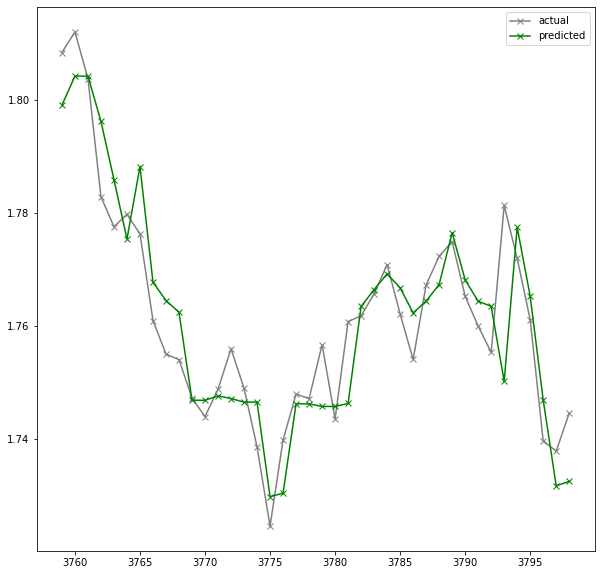

In [500]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
line1 = plt.plot(df_t.test, label = 'actual', marker='x', color='grey')
#include actual high and low range

line2 = plt.plot(df_t.pred, label = 'predicted', marker='x', color='g')
plt.legend()
plt.show()
 

In [489]:
#include actual high and low range
df_t['test_high']=df_raw1.iloc[-40:,2:3].shift(-1)
df_t['test_low']=df_raw1.iloc[-40:,3:4].shift(-1)
df_t

,test,pred,test_high,test_low
3759,1.80837,1.799071,NaN,NaN
3760,1.81201,1.804197,1.81770,1.80494
3761,1.80375,1.804197,1.81605,1.80041
3762,1.78288,1.796199,1.80375,1.77969
3763,1.77758,1.785885,1.78483,1.77525
3764,1.77978,1.775409,1.78436,1.77373
3765,1.77633,1.788225,1.78332,1.77474
3766,1.76100,1.767773,1.78203,1.75912
3767,1.75507,1.764540,1.76629,1.75282
3768,1.75410,1.762464,1.75940,1.75211


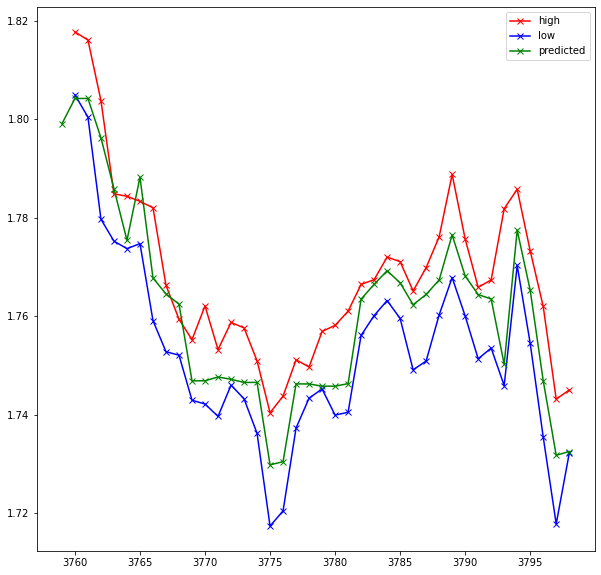

In [493]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
#line1 = plt.plot(df_t.test, label = 'actual', marker='x')
#include actual high and low range
line1_h = plt.plot(df_t.test_high, label = 'high', marker='x', color='r')
line1_l = plt.plot(df_t.test_low, label = 'low', marker='x', color='b')

line2 = plt.plot(df_t.pred, label = 'predicted', marker='x', color='g')
plt.legend()
plt.show()
 

In [491]:
# clears the model after a run so you can contrast new runs.
# predictor.unpersist_models('ag_predict_interval')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
%rm -rf AutogluonModels, ag_predict_interval
!ls

agModels-predictClose
EURUSD_Daily_197101040000_202205060000.csv
GBPAUD_Daily_200708210000_202205060000.csv
sample_data
